In [1]:
# パッケージの読み込み
using Distributions, PyPlot, LinearAlgebra

In [2]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
end

set_options (generic function with 1 method)

## ベルヌーイモデル

### 生成過程

In [3]:
function generate(N)
    μ = rand(Uniform(0, 1))
    X = rand(Bernoulli(μ), N)
    μ, X
end

# 5回コイン投げを行う
generate(5)

(0.507033978237883, Bool[1, 1, 1, 1, 1])

In [4]:
# 1を表，０を裏とする
side(x) = x == 1 ? "表" : "裏"

for i in 1:10
    μ, X = generate(5)
    println("コイン$(i), 表が出る確率 μ=$(μ), 出目 X=$(side.(X))")
end

コイン1, 表が出る確率 μ=0.5819206140076049, 出目 X=["裏", "表", "裏", "裏", "裏"]
コイン2, 表が出る確率 μ=0.6572388683013812, 出目 X=["表", "裏", "裏", "表", "表"]
コイン3, 表が出る確率 μ=0.09702142194730812, 出目 X=["裏", "裏", "裏", "裏", "裏"]
コイン4, 表が出る確率 μ=0.9280492380414076, 出目 X=["表", "表", "表", "表", "表"]
コイン5, 表が出る確率 μ=0.05246963820519779, 出目 X=["裏", "表", "裏", "裏", "裏"]
コイン6, 表が出る確率 μ=0.7908977061366735, 出目 X=["表", "裏", "裏", "表", "表"]
コイン7, 表が出る確率 μ=0.9306353379696044, 出目 X=["表", "表", "表", "表", "表"]
コイン8, 表が出る確率 μ=0.5444768429201985, 出目 X=["表", "表", "表", "表", "表"]
コイン9, 表が出る確率 μ=0.5929263768522527, 出目 X=["表", "表", "表", "裏", "裏"]
コイン10, 表が出る確率 μ=0.30653784348055735, 出目 X=["裏", "裏", "裏", "裏", "表"]


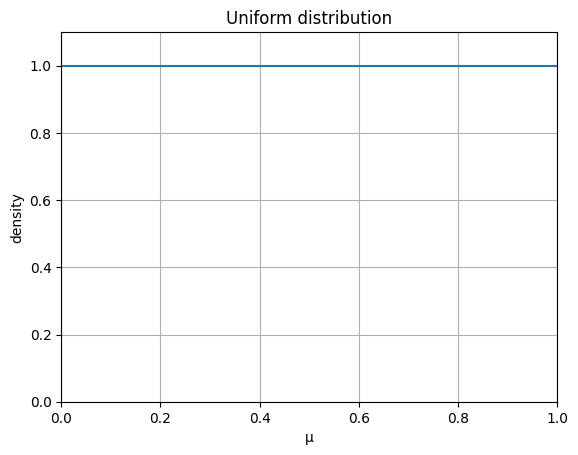

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /root/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


(0.0, 1.1)

In [5]:
μs = range(0, 1, length=100)
fig, ax = subplots()
ax.plot(μs, pdf.(Uniform(0, 1), μs))
set_options(ax, "μ", "density", "Uniform distribution")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.1])

### 伝承サンプリング

In [6]:
# 「裏，裏，裏，表，表」をデータとして取得
X_obs1 = [0, 0, 0, 1, 1]

5-element Vector{Int64}:
 0
 0
 0
 1
 1

In [7]:
maxiter = 1_000_000
μ_posterior1 = []
for i in 1:maxiter
    # パラメータおよびデータの生成
    μ, X = generate(length(X_obs1))
    
    # X内の１の合計が観測と一致していれば，このときのパラメータを受容
    sum(X) == sum(X_obs1) && push!(μ_posterior1, μ)
end

# 受容率の計算
acceptance_rate = length(μ_posterior1) / maxiter
println("acceptance rate = $(acceptance_rate)")

μ_posterior1'

acceptance rate = 0.166623


1×166623 adjoint(::Vector{Any}) with eltype Any:
 0.415512  0.399776  0.38031  0.459809  …  0.378602  0.648238  0.182963

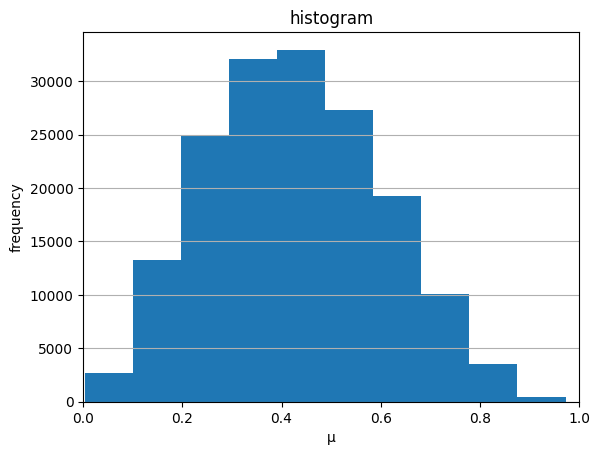

false

In [8]:
fig, ax = subplots()
ax.hist(μ_posterior1)
ax.set_xlim([0, 1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

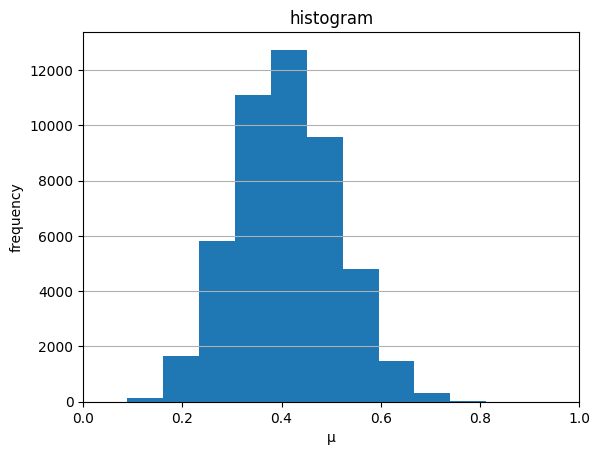

acceptance rate = 0.047643


false

In [9]:
X_obs2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

maxiter = 1_000_000
μ_posterior2 = []
for i in 1:maxiter
    # パラメータおよびデータの生成
    μ, X = generate(length(X_obs2))
    
    # X内の１の合計が観測と一致していれば，このときのパラメータを受容
    sum(X) == sum(X_obs2) && push!(μ_posterior2, μ)
end

# 受容率の計算
acceptance_rate = length(μ_posterior2) / maxiter
println("acceptance rate = $(acceptance_rate)")

fig, ax = subplots()
ax.hist(μ_posterior2)
ax.set_xlim([0, 1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

### 予測

In [10]:
pred1 = mean(rand.(Bernoulli.(μ_posterior1)))
pred2 = mean(rand.(Bernoulli.(μ_posterior2)))

println("$(pred1), $(pred2)")

0.4290644148766977, 0.4081606951703293


### 事前分布の変更

In [14]:
function generate2(N)
    μ = rand(Uniform(0, 0.5))
    X = rand(Bernoulli(μ), N)
    μ, X
end
generate2(5)

(0.2379865464772299, Bool[1, 1, 0, 0, 0])

In [16]:
for i in 1:10
    μ, X = generate2(5)
    println("コイン$(i), 表が出る確率 μ = $(μ), 出目 X = $(side.(X))")
end

コイン1, 表が出る確率 μ = 0.4731487670384723, 出目 X = ["表", "裏", "裏", "表", "裏"]
コイン2, 表が出る確率 μ = 0.4725112412917896, 出目 X = ["表", "裏", "裏", "裏", "裏"]
コイン3, 表が出る確率 μ = 0.3813022428800125, 出目 X = ["表", "表", "裏", "表", "裏"]
コイン4, 表が出る確率 μ = 0.21509004488265426, 出目 X = ["裏", "裏", "表", "裏", "裏"]
コイン5, 表が出る確率 μ = 0.3259138445316416, 出目 X = ["表", "表", "裏", "裏", "裏"]
コイン6, 表が出る確率 μ = 0.0025000879178419533, 出目 X = ["裏", "裏", "裏", "裏", "裏"]
コイン7, 表が出る確率 μ = 0.36074860400998315, 出目 X = ["裏", "裏", "表", "表", "裏"]
コイン8, 表が出る確率 μ = 0.07601029536952886, 出目 X = ["裏", "裏", "裏", "裏", "裏"]
コイン9, 表が出る確率 μ = 0.02366081199768849, 出目 X = ["裏", "裏", "裏", "裏", "裏"]
コイン10, 表が出る確率 μ = 0.3550113356852258, 出目 X = ["裏", "裏", "裏", "裏", "表"]


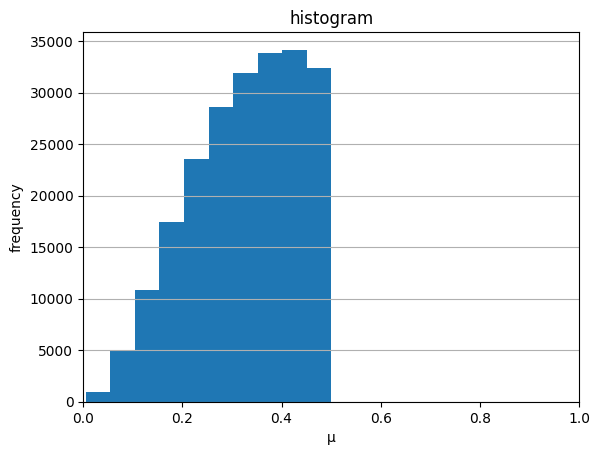

false

In [19]:
μ_posterior3 = []
for i in 1:maxiter
    # パラメータおよびデータの生成
    μ, X = generate2(length(X_obs1))
    
    # X内の１の合計が観測と一致していれば，このときのパラメータを受容
    sum(X) == sum(X_obs1) && push!(μ_posterior3, μ)
end

fig, ax = subplots()
ax.hist(μ_posterior3)
ax.set_xlim([0, 1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

### 数値積分による推論計算

In [20]:
# 同時分布p(X, μ)の確率密度関数の定義
p_joint(X, μ) = prod(pdf.(Bernoulli(μ), X)) * pdf(Uniform(0, 1), μ)

# 数値積分
function approx_integration(μ_range, p)
    Δ = μ_range[2] - μ_range[1]
    X -> sum([p(X, μ) * Δ for μ in μ_range]), Δ
end

# μの積分範囲
μ_range = range(0, 1, length=100)

# 数値積分の実行
p_marginal, Δ = approx_integration(μ_range, p_joint)

# データ（２種類）
X_obs1 = [0, 0, 0, 1, 1]
X_obs2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

# それぞれの周辺尤度の近似計算
println("$(p_marginal(X_obs1)), $(p_marginal(X_obs2))")

0.016666666493163278, 3.7801895387034807e-7


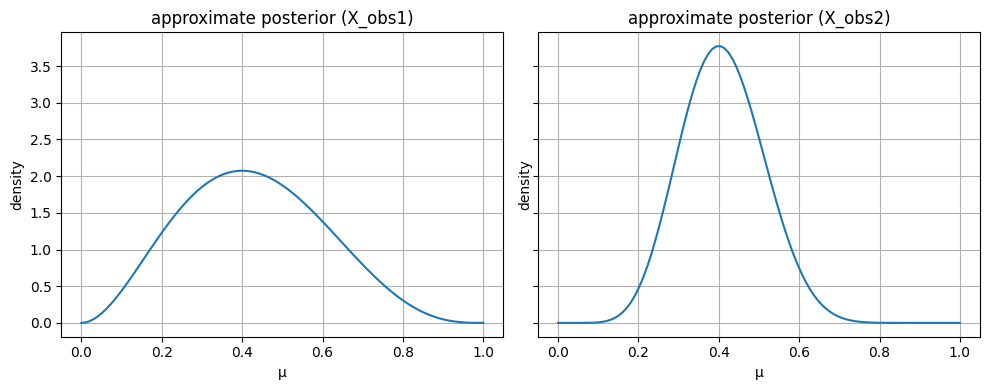

In [22]:
# パラメータの可視化範囲
μs = range(0, 1, length=100)

fig, axes = subplots(1, 2, sharey=true, figsize=(10, 4))
for (i, X_obs) in enumerate([X_obs1, X_obs2])
    posterior(μ) = p_joint(X_obs, μ) / p_marginal(X_obs)
    axes[i].plot(μs, posterior.(μs))
    set_options(axes[i], "μ", "density", "approximate posterior (X_obs$(i))")
end
tight_layout()

In [23]:
# 積分の中身の式
posterior1(μ) = p_joint(X_obs1, μ) / p_marginal(X_obs1)
posterior2(μ) = p_joint(X_obs2, μ) / p_marginal(X_obs2)
p_inner1(x, μ) = pdf.(Bernoulli(μ), x) * posterior1(μ)
p_inner2(x, μ) = pdf.(Bernoulli(μ), x) * posterior2(μ)

# パラメータμに関する積分
μ_range = range(0, 1, length=100)
pred1, Δ1 = approx_integration(μ_range, p_inner1)
pred2, Δ2 = approx_integration(μ_range, p_inner2)

println("$(pred1(1)), $(pred2(1))")

0.4285714434416307, 0.40909090909090784


### 厳密解法

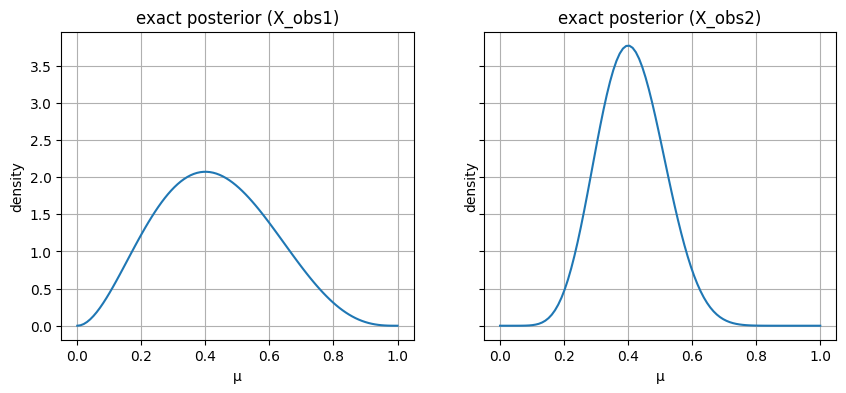

In [26]:
fig, axes = subplots(1, 2, sharey=true, figsize=(10, 4))
μs = range(0, 1, length=100)
for (i, X_obs) in enumerate([X_obs1, X_obs2])
    # 厳密の事後分布はベータ分布
    α = 1.0 + sum(X_obs)
    β = 1.0 + length(X_obs) - sum(X_obs)
    d = Beta(α, β)
    
    # 事後分布を可視化
    axes[i].plot(μs, pdf.(d, μs))
    set_options(axes[i], "μ", "density", "exact posterior (X_obs$(i))")
end

In [27]:
function prediction(X_obs)
    α = 1.0 + sum(X_obs)
    β = 1.0 + length(X_obs) - sum(X_obs)
    α/(α + β)
end

println("$(prediction(X_obs1)), $(prediction(X_obs2))")

0.42857142857142855, 0.4090909090909091
